# Librerías

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive

# Conexión al repositorio de datos

In [2]:
#Accedemos a Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lectura de datos

In [3]:
#Leemos los datos
#Se trata de un dataset que describe las características de billetes verdaderos y falsos
df = pd.read_csv('/content/drive/MyDrive/Data/billetes.csv')
df

#No entraremos mucho en los detalles de qué significa cada variable
#Cada variable indica una característica del billete
#El label "class" determina si un billete es o no falso

,variace,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


# Definición de "features"

In [4]:
#Definimos los features
x = df[['variace', 'skewness', 'curtosis', 'entropy']].values
x

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [5]:
#En el caso de los features, vamos a escalarlos con valores entre 0 y 1

In [6]:
#Importamos la librería para escalar
from sklearn.preprocessing import scale

In [7]:
#Escalamos
x = scale(x)
x

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

# Definición de "labels"

In [8]:
#Definimos los labels
y = df['class'].values
y

array([0, 0, 0, ..., 1, 1, 1])

# Un modelo de Machine Learning clásico: Random Forest

In [9]:
#Por un momento vamos a usar otro modelo diferente a los de Deep Learning
#Vamos a usar un RandomForest
#Un RandomForest es un conjunto de árboles de decisión
#No nos importará cómo se crea, sólo lo usaremos para compararlo con la red neuronal

#Importamos la librería
from sklearn.ensemble import RandomForestClassifier

In [10]:
#Creamos el modelo
model = RandomForestClassifier()

In [11]:
#Aplicamos validación cruzada para ver el ratio de predicción

#Importamos la función de validación cruzada
from sklearn.model_selection import cross_val_score

#Por defecto, la función realiza 5 validaciones
cross_val_score(model, x, y)

array([0.99636364, 0.99636364, 0.98905109, 0.99635036, 0.99635036])

# Generación de una neurona con ratio de aprendizaje

In [12]:
#Importamos la librería para dividir los datos
from sklearn.model_selection import train_test_split

#Dividimos los datos en datos de entrenamiento (x_train, y_train) y datos de validación (x_test, y_test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [13]:
#Importamos las librerías de Keras
from keras.models import Sequential
from keras.layers import Dense, Activation

#Importamos un optimizador
#Ya sabemos que podemos usar el método de gradiente descendiente para encontrar el punto en dónde se mimice el error en nuestra función de costo
#Usaremos una gradiente descendiente conocida como SDG: Stocastic Descendent Gradiente (Gradiente descedente estocástica)
#¿Qué significa?, al decir que es estocástica significa que estamos colocando el punto inicial de evaluación de manera aleatoria
from tensorflow.keras.optimizers import SGD

In [14]:
#Instaciamos un modelo de machine learning vacío con "Sequential"
model = Sequential()

In [15]:
#Agregamos sólo 1 neurona con 4 entradas
#Como estamos frente a un problema de clasificación binaria, la F.A. más adecuada es la "sigmoid"
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

In [16]:
#Compilamos probando un "learning rate" (lr) pequeño de 0.01
model.compile(
  loss='binary_crossentropy',
  optimizer=SGD(lr=0.01),
  metrics=['accuracy']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [17]:
#Entrenamos el modelo
#Esta vez al momento de entrenar, vamos a guardar la descripción del entrenamiento
#Configuramos 10 iteraciones
descripcion_de_entrenamiento = model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
35/35 [==============================] - 1s 1ms/step - loss: 0.9486 - accuracy: 0.3345
Epoch 2/10
35/35 [==============================] - 0s 1ms/step - loss: 0.8228 - accuracy: 0.4047
Epoch 3/10
35/35 [==============================] - 0s 1ms/step - loss: 0.7231 - accuracy: 0.5141
Epoch 4/10
35/35 [==============================] - 0s 1ms/step - loss: 0.6445 - accuracy: 0.7129
Epoch 5/10
35/35 [==============================] - 0s 1ms/step - loss: 0.5832 - accuracy: 0.8778
Epoch 6/10
35/35 [==============================] - 0s 1ms/step - loss: 0.5356 - accuracy: 0.9307
Epoch 7/10
35/35 [==============================] - 0s 1ms/step - loss: 0.4987 - accuracy: 0.9426
Epoch 8/10
35/35 [==============================] - 0s 1ms/step - loss: 0.4687 - accuracy: 0.9371
Epoch 9/10
35/35 [==============================] - 0s 1ms/step - loss: 0.4441 - accuracy: 0.9362
Epoch 10/10
35/35 [==============================] - 0s 1ms/step - loss: 0.4235 - accuracy: 0.9325


In [18]:
#Dentro de esta variable encontraremos el accuracy de entrenamiento y el error de ganancia de descubrimiento de patrones al entrenar (loss)
descripcion_de_entrenamiento.history

{'accuracy': [0.3345487713813782,
  0.40474021434783936,
  0.5141294598579407,
  0.7128532528877258,
  0.8778486847877502,
  0.9307201504707336,
  0.9425706267356873,
  0.9371011853218079,
  0.936189591884613,
  0.9325432777404785],
 'loss': [0.9485770463943481,
  0.8228261470794678,
  0.7231215238571167,
  0.6445474624633789,
  0.5832316875457764,
  0.5356399416923523,
  0.498688668012619,
  0.4686990976333618,
  0.44410961866378784,
  0.42345643043518066]}

In [19]:
#Dentro de esta variable también tenemos el número de iteraciones que nuestro modelo ha hecho
descripcion_de_entrenamiento.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [20]:
#Evaluamos el modelo con los datos de entrenamiento
accuracy = model.evaluate(x_test, y_test)
accuracy

9/9 [==============================] - 0s 1ms/step - loss: 0.4096 - accuracy: 0.9418


[0.40964755415916443, 0.9418181777000427]

In [21]:
#Colocamos los datos en un dataframe de pandas
#El dataframe tendrá dos variables: accuracy y loss
dfDescripcion = pd.DataFrame(
    descripcion_de_entrenamiento.history,
    index = descripcion_de_entrenamiento.epoch
)

dfDescripcion

,loss,accuracy
0,0.948577,0.334549
1,0.822826,0.404740
2,0.723122,0.514129
3,0.644547,0.712853
4,0.583232,0.877849
5,0.535640,0.930720
6,0.498689,0.942571
7,0.468699,0.937101
8,0.444110,0.936190
9,0.423456,0.932543


# Calibración del ratio de aprendizaje

In [22]:
#¿El valor de lr = 0.01 será muy grande o muy pequeño?
#Vamos a calibrar el valor de lr para saberlo

In [23]:
#Probaremos diferentes valores para lr
array_lr = [0.01, 0.05, 0.1, 0.5]

In [24]:
#Creamos un array en donde guardaremos las descripciones de cada entrenamiento
array_descripciones = []

In [25]:
#Iteramos cada calibración
for lr in array_lr:
  model = Sequential()
  model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
  
  #Agregamos el "lr" de la calibración
  model.compile(
    loss='binary_crossentropy',
    optimizer=SGD(lr=lr),
    metrics=['accuracy']
  )
  
  #Entrenamos la neurona
  #Para evitar que el output de entrenamiento se muestre en pantalla desactivamos la variable "verbose"
  descripcion_de_entrenamiento = model.fit(x_train, y_train, epochs = 10, batch_size=16, verbose=0)

  #Convertimos la descripción del entrenamiento en un dataframe
  df = pd.DataFrame(
      descripcion_de_entrenamiento.history,
      index = descripcion_de_entrenamiento.epoch
  )

  #Agregamos el dataframe a la lista de descripciones de entrenamiento
  array_descripciones.append(df)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [26]:
#Dentro de nuestro array de descripciones tendremos las descripciones de los cuatro entrenamientos con diferentes "lr"

#El primer entrenamiento con lr = 0.01
array_descripciones[0]

,loss,accuracy
0,1.005324,0.399271
1,0.783567,0.534184
2,0.630632,0.680036
3,0.525974,0.804011
4,0.453674,0.868733
5,0.402829,0.919781
6,0.365800,0.959891
7,0.337906,0.969918
8,0.316213,0.971741
9,0.298730,0.969918


In [27]:
#El segundo entrenamiento con lr = 0.05
array_descripciones[1]

,loss,accuracy
0,0.430074,0.908842
1,0.281025,0.971741
2,0.231607,0.968095
3,0.203333,0.968095
4,0.183550,0.968095
5,0.168534,0.970830
6,0.156577,0.970830
7,0.146815,0.972653
8,0.138552,0.972653
9,0.131511,0.972653


In [28]:
#Esto es un array de dataframes
type(array_descripciones)

list

In [29]:
#Vamos a fusionar los cuatro dataframes en uno solo
#Para eso usamos la función "concat" de pandas
#Podríamos fusionar cada dataframe como si fuese un registro de la siguiente manera
dfDescripcion = pd.concat(array_descripciones)
dfDescripcion

,loss,accuracy
0,1.005324,0.399271
1,0.783567,0.534184
2,0.630632,0.680036
3,0.525974,0.804011
4,0.453674,0.868733
5,0.402829,0.919781
6,0.365800,0.959891
7,0.337906,0.969918
8,0.316213,0.971741
9,0.298730,0.969918


In [30]:
#Pero esta vez los fusionaremos uno tras otro para crear un único registro
#Recordemos que al usar "axis = 1" estamos fusionandolas filas
dfDescripcion = pd.concat(array_descripciones, axis = 1)
dfDescripcion

,loss,accuracy,loss,accuracy,loss,accuracy,loss,accuracy
0,1.005324,0.399271,0.430074,0.908842,0.335991,0.945305,0.279429,0.894257
1,0.783567,0.534184,0.281025,0.971741,0.228656,0.958067,0.121337,0.973564
2,0.630632,0.680036,0.231607,0.968095,0.184308,0.961714,0.089055,0.978122
3,0.525974,0.804011,0.203333,0.968095,0.157476,0.969918,0.075063,0.979945
4,0.453674,0.868733,0.183550,0.968095,0.139054,0.970830,0.066499,0.982680
5,0.402829,0.919781,0.168534,0.970830,0.125747,0.973564,0.060816,0.982680
6,0.365800,0.959891,0.156577,0.970830,0.115612,0.976299,0.056616,0.982680
7,0.337906,0.969918,0.146815,0.972653,0.107558,0.977211,0.053365,0.984503
8,0.316213,0.971741,0.138552,0.972653,0.101016,0.978122,0.050958,0.983592
9,0.298730,0.969918,0.131511,0.972653,0.095641,0.979034,0.048692,0.983592


In [31]:
#A cada "loss" y "accuracy" vamos a agregarle por encima su lr
#Obtenemos el primer elemento del array de dataframes para obtener los títulos de las columnas
columnas_loss_accuracy = array_descripciones[0].columns
columnas_loss_accuracy

Index(['loss', 'accuracy'], dtype='object')

In [32]:
#Vamos a crear nuevas columnas a nuestro dataframe
#Primero colocaremos las columnas que tendrán el nombre de cada lr usado, estos valores están en "array_lr"
#Luego, para cada "lr" vamos a colocarle las columnas "columnas_loss_accuracy"
#Estas son columnas anidadas, las podemos crear con la función "MultiIndex" de Pandas
#Por último, con el parámetro "names" colocamos el nombre para cada agrupación de columnas
nuevas_columnas = pd.MultiIndex.from_product(
  [array_lr, columnas_loss_accuracy],
  names=['lr', 'metricas']
)

nuevas_columnas

MultiIndex([(0.01,     'loss'),
            (0.01, 'accuracy'),
            (0.05,     'loss'),
            (0.05, 'accuracy'),
            ( 0.1,     'loss'),
            ( 0.1, 'accuracy'),
            ( 0.5,     'loss'),
            ( 0.5, 'accuracy')],
           names=['lr', 'metricas'])

In [33]:
#Colocamos las nuevas columnas a nuestro dataframe
dfDescripcion.columns = nuevas_columnas
dfDescripcion

lr            0.01                0.05  ...      0.10      0.50          
metricas      loss  accuracy      loss  ...  accuracy      loss  accuracy
0         1.005324  0.399271  0.430074  ...  0.945305  0.279429  0.894257
1         0.783567  0.534184  0.281025  ...  0.958067  0.121337  0.973564
2         0.630632  0.680036  0.231607  ...  0.961714  0.089055  0.978122
3         0.525974  0.804011  0.203333  ...  0.969918  0.075063  0.979945
4         0.453674  0.868733  0.183550  ...  0.970830  0.066499  0.982680
5         0.402829  0.919781  0.168534  ...  0.973564  0.060816  0.982680
6         0.365800  0.959891  0.156577  ...  0.976299  0.056616  0.982680
7         0.337906  0.969918  0.146815  ...  0.977211  0.053365  0.984503
8         0.316213  0.971741  0.138552  ...  0.978122  0.050958  0.983592
9         0.298730  0.969918  0.131511  ...  0.979034  0.048692  0.983592

[10 rows x 8 columns]

In [34]:
#Vamos a crear el dataframe de "loss"
#Usaremos la función "xs" que nos permite navegar en un dataframe con índices complejos y extraer los campos que queremos
#En la función "xs" definimos:
# 1. El campo que queremos consultar (loss)
# 2. De qué subconjunto de campos queremos consultar (level = 'metricas')
# 3. Cómo queremos extraer la data (axis = 1, queremos extraerla como columnas)
dfLoss = dfDescripcion.xs('loss', level = 'metricas', axis = 1)
dfLoss

lr,0.01,0.05,0.10,0.50
0,1.005324,0.430074,0.335991,0.279429
1,0.783567,0.281025,0.228656,0.121337
2,0.630632,0.231607,0.184308,0.089055
3,0.525974,0.203333,0.157476,0.075063
4,0.453674,0.183550,0.139054,0.066499
5,0.402829,0.168534,0.125747,0.060816
6,0.365800,0.156577,0.115612,0.056616
7,0.337906,0.146815,0.107558,0.053365
8,0.316213,0.138552,0.101016,0.050958
9,0.298730,0.131511,0.095641,0.048692


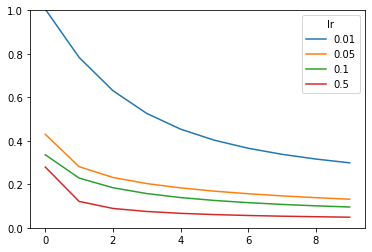

In [35]:
#Vamos a graficar este dataframe
#Recordemos que mientras más pequeño sea el "loss" en cada iteración significa que el error se está minimizando
#En el eje X colocará los índices de cada iteración
#En el eje Y el valor de su "loss"
#Como son cuatro lr, creará cuatro gráficos
dfLoss.plot(ylim=(0,1))

In [36]:
#INTERPRETACIÓN
#Notemos como con un valor muy pequeño para "lr" (0.01), el "loss" disminuye muy lentamente y va de 0.6 a 0.4
#En cambio con un valor muy grande para "lr" (0.5), el "loss" disminuye más rápidamente y va de 0.2 a casi 0
#Eso significa que para este conjunto de datos el "lr" se optimiza al aumentarse
#Podríamos seguir aumentando el valor de "lr" para ver cuál es el límite en dónde ya no podemos optimizar más

In [37]:
#Vamos a crear el dataframe de "accuracy"
#Usaremos la función "xs" que nos permite navegar en un dataframe con índices complejos y extraer los campos que queremos
#En la función "xs" definimos:
# 1. El campo que queremos consultar (accuracy)
# 2. De qué subconjunto de campos queremos consultar (level = 'metricas')
# 3. Cómo queremos extraer la data (axis = 1, queremos extraerla como columnas)
dfAccuracy = dfDescripcion.xs('accuracy', level = 'metricas', axis = 1)
dfAccuracy

lr,0.01,0.05,0.10,0.50
0,0.399271,0.908842,0.945305,0.894257
1,0.534184,0.971741,0.958067,0.973564
2,0.680036,0.968095,0.961714,0.978122
3,0.804011,0.968095,0.969918,0.979945
4,0.868733,0.968095,0.970830,0.982680
5,0.919781,0.970830,0.973564,0.982680
6,0.959891,0.970830,0.976299,0.982680
7,0.969918,0.972653,0.977211,0.984503
8,0.971741,0.972653,0.978122,0.983592
9,0.969918,0.972653,0.979034,0.983592


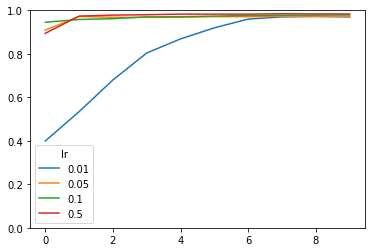

In [38]:
#Vamos a graficar este dataframe
#Recordemos que mientras más pequeño sea el "accuracy" en cada iteración significa que los aciertos se están maximizando
#En el eje X colocará los índices de cada iteración
#En el eje Y el valor de su "accuracy"
#Como son cuatro lr, creará cuatro gráficos
dfAccuracy.plot(ylim=(0,1))

In [39]:
#INTERPRETACIÓN
#Notemos como con un valor muy pequeño para "lr" (0.01), el "accuracy" aumenta en 10 iteraciones hasta un 89%
#En cambio con un valor muy grande para "lr" (0.5), el "accuracy" aumenta en 10 iteraciones hasta un 98%
#Eso significa que para este conjunto de datos el "lr" se optimiza al aumentarse
#Podríamos seguir aumentando el valor de "lr" para ver cuál es el límite en dónde ya no podemos optimizar más